# 01-Manipulando datos

## Importar librerías

In [1]:
import pandas as pd
import numpy as np

### Cargar el CSV de clientes
* Dentro de la carpeta Recursos encontraremos un CSV llamado clientes_ml

In [2]:
clientes = pd.read_csv("Recursos/01-clientes_ml.csv")
clientes.head() # Muestra las primeras filas, con tail() las ultimas filas

,id,nombre,ciudad,edad,ingresos_mensuales,gasto_ultimo_mes
0,1,Ana,Santiago,25,850000,120000
1,2,Bruno,Valparaíso,32,1100000,250000
2,3,Carla,Santiago,41,1450000,310000
3,4,Diego,Concepción,29,900000,190000
4,5,Elena,Santiago,36,1300000,270000


## Inspección rápida del DataFrame

In [3]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  5 non-null      int64 
 1   nombre              5 non-null      object
 2   ciudad              5 non-null      object
 3   edad                5 non-null      int64 
 4   ingresos_mensuales  5 non-null      int64 
 5   gasto_ultimo_mes    5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 372.0+ bytes


In [4]:
clientes.describe()

,id,edad,ingresos_mensuales,gasto_ultimo_mes
count,5.000000,5.000000,5.000000e+00,5.000000
mean,3.000000,32.600000,1.120000e+06,228000.000000
std,1.581139,6.188699,2.564176e+05,74296.702484
min,1.000000,25.000000,8.500000e+05,120000.000000
25%,2.000000,29.000000,9.000000e+05,190000.000000
50%,3.000000,32.000000,1.100000e+06,250000.000000
75%,4.000000,36.000000,1.300000e+06,270000.000000
max,5.000000,41.000000,1.450000e+06,310000.000000


## Seleccionar columnas

In [5]:
# Una columna
clientes["edad"]

0    25
1    32
2    41
3    29
4    36
Name: edad, dtype: int64

In [6]:
# Varias columnas
clientes[["nombre", "ciudad", "edad"]]

,nombre,ciudad,edad
0,Ana,Santiago,25
1,Bruno,Valparaíso,32
2,Carla,Santiago,41
3,Diego,Concepción,29
4,Elena,Santiago,36


## Seleccionar filas

In [7]:
# Filas por posición
clientes.iloc[0]        # primera fila

id                           1
nombre                     Ana
ciudad                Santiago
edad                        25
ingresos_mensuales      850000
gasto_ultimo_mes        120000
Name: 0, dtype: object

In [8]:
clientes.iloc[0:3]      # primeras 3 filas

,id,nombre,ciudad,edad,ingresos_mensuales,gasto_ultimo_mes
0,1,Ana,Santiago,25,850000,120000
1,2,Bruno,Valparaíso,32,1100000,250000
2,3,Carla,Santiago,41,1450000,310000


In [9]:
# Filas por condición (boolean indexing)
clientes[clientes["ciudad"] == "Santiago"]

,id,nombre,ciudad,edad,ingresos_mensuales,gasto_ultimo_mes
0,1,Ana,Santiago,25,850000,120000
2,3,Carla,Santiago,41,1450000,310000
4,5,Elena,Santiago,36,1300000,270000


In [10]:
# Condición compuesta
clientes[(clientes["ciudad"] == "Santiago") & (clientes["edad"] > 30)]

,id,nombre,ciudad,edad,ingresos_mensuales,gasto_ultimo_mes
2,3,Carla,Santiago,41,1450000,310000
4,5,Elena,Santiago,36,1300000,270000


## Ordenar datos

In [11]:
# Ordenar por edad ascendente
clientes.sort_values(by="edad")

,id,nombre,ciudad,edad,ingresos_mensuales,gasto_ultimo_mes
0,1,Ana,Santiago,25,850000,120000
3,4,Diego,Concepción,29,900000,190000
1,2,Bruno,Valparaíso,32,1100000,250000
4,5,Elena,Santiago,36,1300000,270000
2,3,Carla,Santiago,41,1450000,310000


In [12]:
# Ordenar por gasto descendente
clientes.sort_values(by="gasto_ultimo_mes", ascending=False)

,id,nombre,ciudad,edad,ingresos_mensuales,gasto_ultimo_mes
2,3,Carla,Santiago,41,1450000,310000
4,5,Elena,Santiago,36,1300000,270000
1,2,Bruno,Valparaíso,32,1100000,250000
3,4,Diego,Concepción,29,900000,190000
0,1,Ana,Santiago,25,850000,120000


## Crear columnas nuevas (pandas + NumPy)

In [13]:
# A partir del "ingresos_mensuales" crearemos un Ingreso anual estimado
clientes["ingreso_anual"] = clientes["ingresos_mensuales"] * 12
clientes.head()

,id,nombre,ciudad,edad,ingresos_mensuales,gasto_ultimo_mes,ingreso_anual
0,1,Ana,Santiago,25,850000,120000,10200000
1,2,Bruno,Valparaíso,32,1100000,250000,13200000
2,3,Carla,Santiago,41,1450000,310000,17400000
3,4,Diego,Concepción,29,900000,190000,10800000
4,5,Elena,Santiago,36,1300000,270000,15600000


In [14]:
# Segmentar clientes según gasto usando np.where de Numpy
clientes["segmento"] = np.where(
    clientes["gasto_ultimo_mes"] >= 250000, "Alta",
    np.where(clientes["gasto_ultimo_mes"] >= 150000, "Media", "Baja")
)

clientes[["nombre", "gasto_ultimo_mes", "segmento"]]

,nombre,gasto_ultimo_mes,segmento
0,Ana,120000,Baja
1,Bruno,250000,Alta
2,Carla,310000,Alta
3,Diego,190000,Media
4,Elena,270000,Alta


## Agrupar datos (introducción a groupby)

In [15]:
# Gasto promedio por ciudad
gasto_ciudad = clientes.groupby("ciudad")["gasto_ultimo_mes"].mean()
gasto_ciudad

ciudad
Concepción    190000.000000
Santiago      233333.333333
Valparaíso    250000.000000
Name: gasto_ultimo_mes, dtype: float64

<Axes: title={'center': 'Gasto promedio por ciudad'}, xlabel='ciudad'>

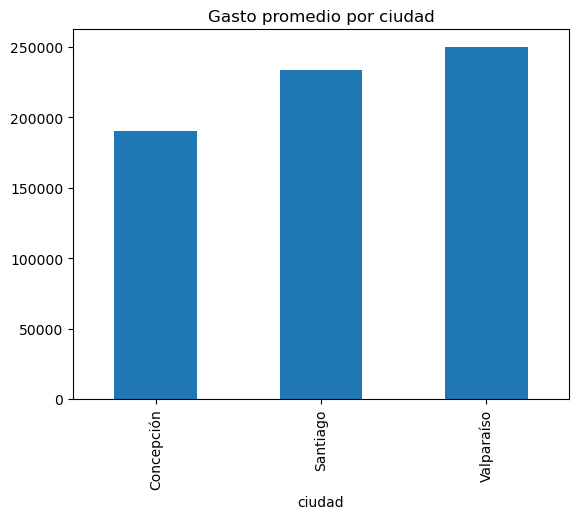

In [16]:
# Lo podemos visualizar
gasto_ciudad.plot(kind="bar", title="Gasto promedio por ciudad")

## Cargar JSON de ventas y unir con clientes

In [17]:
ventas = pd.read_json("Recursos/01-ventas_ml.json")
ventas

,id_venta,id_cliente,monto,medio_pago,canal
0,101,1,120000,tarjeta,online
1,102,2,250000,transferencia,tienda
2,103,3,310000,tarjeta,online
3,104,4,190000,efectivo,tienda
4,105,5,270000,tarjeta,online


In [18]:
# Unir ventas con datos de clientes
ventas_clientes = ventas.merge(
    clientes,
    left_on="id_cliente",
    right_on="id",
    how="left"
)

In [19]:
ventas_clientes[["id_venta", "nombre", "ciudad", "monto", "medio_pago", "canal"]]

,id_venta,nombre,ciudad,monto,medio_pago,canal
0,101,Ana,Santiago,120000,tarjeta,online
1,102,Bruno,Valparaíso,250000,transferencia,tienda
2,103,Carla,Santiago,310000,tarjeta,online
3,104,Diego,Concepción,190000,efectivo,tienda
4,105,Elena,Santiago,270000,tarjeta,online


* Resultado: se juntan las filas donde ventas.id_cliente == clientes.id

## Tarea:
* Calcula el monto promedio por canal (online vs tienda).
* Calcula el gasto total por cliente usando groupby('nombre').